In [2]:
from __future__ import print_function
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys
sys.path.append("C:/Users/Yimeng/Desktop/ipynb/misshapen/")
sys.path.append("C:/Users/Yimeng/Desktop/ipynb/")
import misshapen

In [12]:
data_dir = 'E:/data2/dg'
cue = np.load(data_dir+'/bp/cue.npy')
finger0 = np.load(data_dir+'/bp/finger0.npy')
print (cue)
print(len(finger0))

[ 0.  0.  0. ...,  0.  0.  0.]
610040


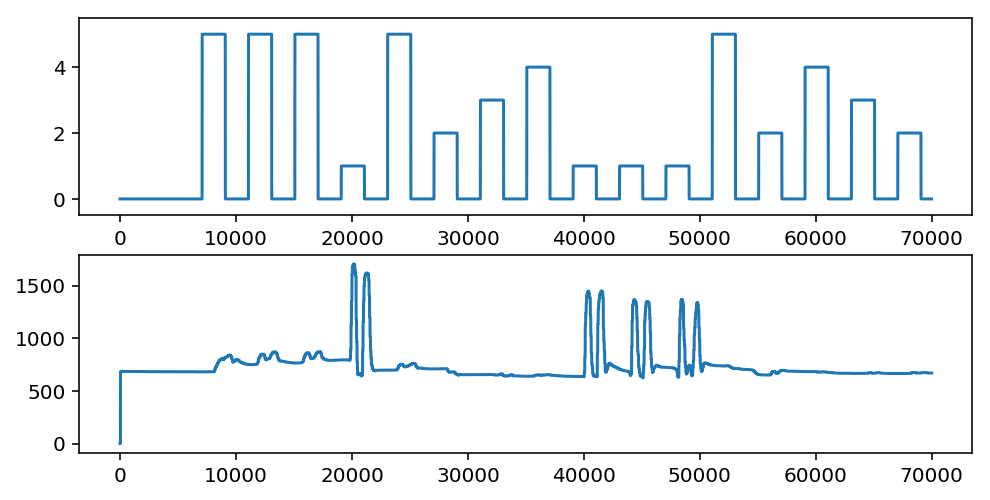

In [4]:
plt.figure(figsize=(8,4))
plt.subplot(2,1,1)
plt.plot(cue[:70000])
plt.ylim((-.5,5.5))
plt.subplot(2,1,2)
plt.plot(finger0[:70000])


In [5]:
from misshapen import nonshape
Fs = 1000.
finger0_filt, _ = nonshape.bandpass_default(finger0,(.5,2),Fs,rmv_edge=False)

In [6]:
from scipy import signal
finger0_filt
f0_amp = np.abs(sp.signal.hilbert(finger0_filt))

[7079, 11079, 15079, 19079, 23079, 27079, 31079, 35079, 39079, 43079, 47079, 51079, 55079, 59079, 63079, 67079, 71079, 75079, 79079, 83079, 87079, 91079, 95079, 99079, 103079, 107079, 111079, 115079, 119079, 123079, 127079, 131079, 135079, 139079, 143079, 147079, 151079, 155079, 159079, 163079, 167079, 171079, 175079, 179079, 183079, 187079, 191079, 195079, 199079, 203079, 207079, 211079, 215079, 219079, 223079, 227079, 231079, 235079, 239079, 243079, 247079, 251079, 255079, 259079, 263079, 267079, 271079, 275079, 279079, 283079, 287079, 291079, 295079, 299079, 303079, 307079, 311079, 315079, 319079, 323079, 327079, 331079, 335079, 339079, 343079, 347079, 351079, 355079, 359079, 363079, 367079, 371079, 375079, 379079, 383079, 387079, 391079, 395079, 399079, 403079, 407079, 411079, 415079, 419079, 423079, 427079, 431079, 435079, 439079, 443079, 447079, 451079, 455079, 459079, 463079, 467079, 471079, 475079, 479079, 483079, 487079, 491079, 495079, 499079, 503079, 507079, 511079, 515079, 

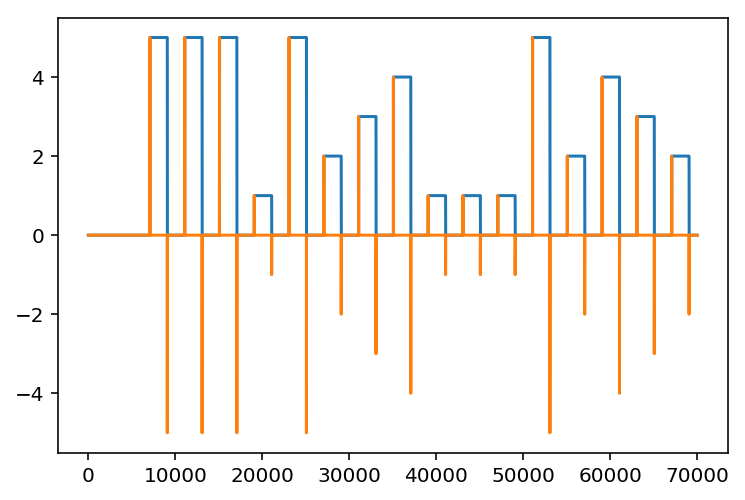

In [13]:
xx=np.diff(cue)
plt.plot(cue[:70000])
plt.plot(xx[:70000])
cue_start = []
cue_end = []
count=0
for i in xx:
    if i > 0:
        cue_start.append(count)
    elif i < 0:
        cue_end.append(count)
    count+=1
print (cue_start)

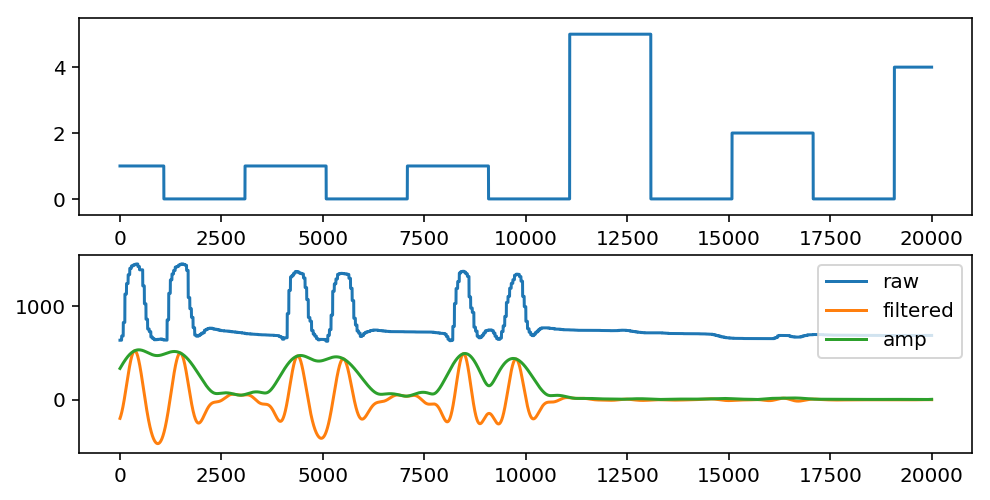

In [8]:
plt.figure(figsize=(8,4))
plt.subplot(2,1,1)
plt.plot(cue[40000:60000])
plt.ylim((-.5,5.5))
plt.subplot(2,1,2)
plt.plot(finger0[40000:60000],label='raw')
plt.plot(finger0_filt[40000:60000],label='filtered')
plt.plot(f0_amp[40000:60000],label='amp')
plt.legend()

In [9]:
# Algorithm
# 1. Find all start and end times of trials
# 2. For each start time, calculate the variance AND MEAN in the preceding 500ms
# 3. For each start time, calculate the max absolute value of the whole trial minus the mean from (2)
# 4. Test if (3) is greater than variance from (2) multiplied by some constant (e.g. 5)

[False False False ..., False False False]


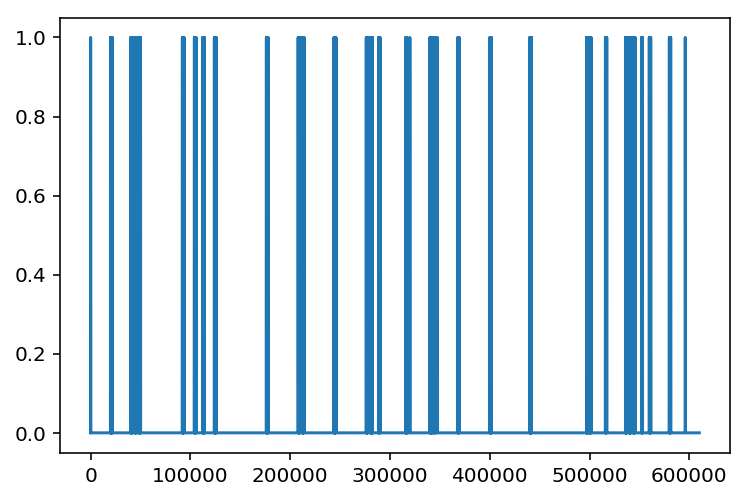

In [21]:
threshold = 50

abs_diff=np.abs(np.diff(finger0))


move_overtime=abs_diff>threshold
plt.plot(move_overtime)
print(move_overtime[20000:30000])
        


In [10]:
rest=True
count=0
interval=2000
rest_var = 
finger_start = []
finger_end = []
amp_diff=np.diff(f0_amp)
print (amp_diff)


            
    
            

SyntaxError: invalid syntax (<ipython-input-10-d35aba9a1863>, line 4)

In [ ]:
for i in amp_diff:
    if rest:
        if i > 0:
            following_var=np.var(f0_amp[count:count+interval/4])
            if following_var < rest_var:
                finger_start.append(i)
                rest = False
    else:
        if i < 0:
            following_var=np.var(f0_amp[count:count+interval/4])
            if following_var < rest_var:
                finger_end.append(i)
                rest = True
    count+=1
                

In [ ]:
for t in finger_start:
    pre_var = np.var(finger0[t-500:t])
    pre_mean = np.mean(finger0[t-500:t])
    

In [ ]:
one_trial = finger0[42000:48000]
start_time = 1000
end_time = 3000
plt.plot(one_trial)

In [ ]:
plt.plot(np.diff(one_trial))

In [ ]:
pretrial_mean = np.mean(one_trial[start_time-500:start_time])
print(pretrial_mean)
pretrial_var = np.var(one_trial[start_time-500:start_time])
print(pretrial_var)

In [ ]:
trial_signal = one_trial[start_time:end_time]
plt.plot(trial_signal-pretrial_mean)
maxv = np.max(trial_signal-pretrial_mean)
print(maxv)

In [ ]:
if maxv > pretrial_var*5:
    print('move!')
else:
    print('no move')

In [ ]:
elec_regions = np.genfromtxt('C:/gh/data/kaidigit/csv/bp_elecregions.csv', delimiter=',')
region_dict = {'dorsal M1':1, 'dorsal S1':3, 'ventral M1 S1':4, 'frontal':6,
               'parietal':7,'temporal':8,'occipital':9}
elec_regions

# Load M1 electrode from subject bp

In [ ]:
# Define data of interest
data_dir = 'E:/data2/dg/'
subj = 'bp'
region = 1
elec_idx = 0

# Determine file name
import glob
ecog_files = glob.glob(data_dir+subj+'/'+str(region)+'/*')
data_file = ecog_files[elec_idx]

# Load data
x = np.load(data_file)

In [ ]:
plt.plot(x[:2000])